# **Imports & Introducing the Dataset**

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats


housing = pd.read_csv('../input/california-housing-prices/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Data Normalization & Cleaning**

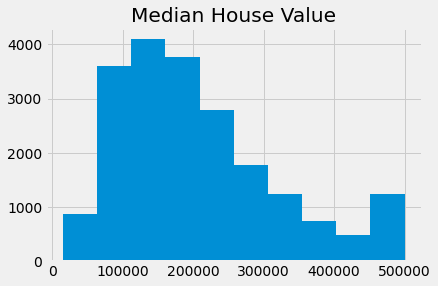

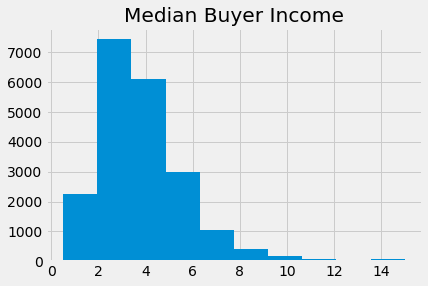

In [82]:
#Variables Median House Value & Age
plt.hist(housing['median_house_value'])
plt.title('Median House Value')
plt.show()

plt.hist(housing['median_income'])
plt.title('Median Buyer Income')
plt.show()

500001.0
15.0001


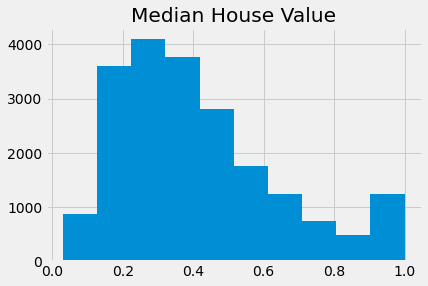

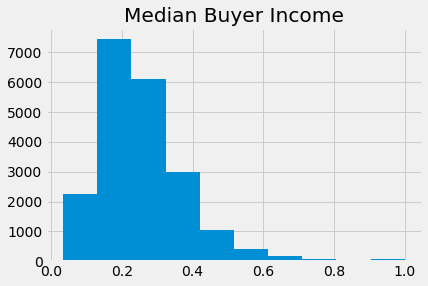

In [86]:
mhv_max = housing['median_house_value'].max()
print(mhv_max)

mbi_max = housing['median_income'].max()
print(mbi_max)

housing['median_house_value'] = housing['median_house_value'] / mhv_max
housing['median_income'] = housing['median_income'] / mbi_max
plt.hist(housing['median_house_value'])
plt.title('Median House Value')
plt.show()

plt.hist(housing['median_income'])
plt.title('Median Buyer Income')
plt.show()

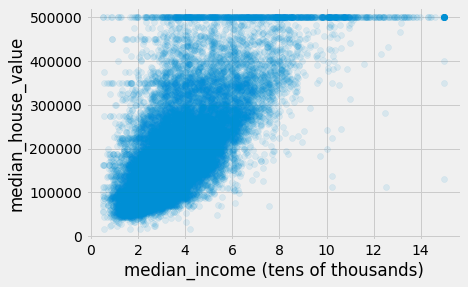

In [24]:
#The two variables we will use for regression are housing median age & median house value
income = housing['median_income']
house_value = housing['median_house_value']


The hypothesis that we use for linear regression is y = mx + b
--> We have to ask for a give scatter plot how to we go about choosing
m & b to yield a succesful line of best fit


# different hypotheses will yield different prediction accuracy, We want the highest accuracy possible!!
# Let's find m & b values that allow us to predict y effectively :>

plt.scatter(income, house_value, alpha = .1)
plt.xlabel('median_income (tens of thousands)')
plt.ylabel('median_house_value')
plt.style.use('fivethirtyeight')
plt.show()

![](https://stackabuse.s3.amazonaws.com/media/covariance-and-correlation-in-python-3.png)

* xi, yi - are individual elements of the x and y series
* x̄, y̅ - are the mathematical means of the x and y series
* N - is the number of elements in the series

In [25]:
#let's double check that these X & Y variables are actually correlated using covariance
np.cov(income,house_value)

array([[3.60932256e+00, 1.50847483e+05],
       [1.50847483e+05, 1.33161482e+10]])

![](https://qph.fs.quoracdn.net/main-qimg-2ab4fdb2c3b931870f465a082852c3d2.webp)
![](https://study.com/cimages/multimages/16/4e7cf150-0179-4d89-86f2-5cbb1f51c266_meansquarederrorformula.png)


In [5]:
'''
Now we want to start making predictions, and to do this we need an equation of a line that will approximate our y for any given x

recall y = mx + b

1. set m annd b = 0 
2. Use Mean Squared Error Equation to calculate error between real value and predicted value
3. weights and biase updated using the following equation
--> m = m - learning_rate * Derivative of MSE with respect to m
--> b = b - learning_rate * Derivative of MSE with respect to b
4. repeat process 2-4 until convergence

'''

'\nNow we want to start making predictions, and to do this we need an equation of a line that will approximate our y for any given x\n\nrecall y = mx + b\n\n1. set m annd b = 0 \n2. Use Mean Squared Error Equation to calculate error between real value and predicted value\n3. weights and biase updated using the following equation\n--> m = m - learning_rate * Derivative of MSE with respect to m\n--> b = b - learning_rate * Derivative of MSE with respect to b\n4. repeat process 2-4 until convergence\n\n'

In [63]:
class LR_Prediction:
    def hypothesis(x, theta):
        return np.matmul(x,theta)
    
    #the cost function helps the datascientist evaluate the quality of the model
    def cost_function(x,y,theta):
        return((hypothesis(x,theta)- y).T@(hypothesis(x,theta)-y))/(2*y.shape[0])
    
    def gradient_descent(x, y, theta, learning_rate, epochs):
        m = x.shape[0]
        cost_values = []
        
        for epoch in range(epochs):
            h_x = hypothesis(x, theta)
            partial_d_cost = (1/m)*(x.T@(h_x - y))
            theta = theta - (learning_rate)*partial_d_cost
        return theta, cost_values
    

In [ ]:
'''
income = housing['median_income']
house_value = housing['median_house_value']

plt.scatter(income, house_value, alpha = .1)
plt.xlabel('median_income (tens of thousands)')
plt.ylabel('median_house_value')
plt.style.use('fivethirtyeight')
plt.show()

#normalize the data to remove any unwanted bias
def normalize_dataset(dataset):
    normalized_data = stats.boxcox(dataset)

normalize_dataset(housing)
'''